# Introduction

This study aims to classify astronomical objects using different machine-learning models and using only their apparent magnitudes which are a measure of how bright they appear in the sky. The brighter the object the lower the number. 

Different types of astronomical objects have different spectra. We know that light is a spectrum of wavelengths with radio waves at the wide wavelength end and gamma rays at the short end. And the way that different astronomical objects emit light changes from the type of objects they are. The spectra of an object can tell the type of object they are. In the case of stars in the visible part of the spectrum, it can tell us about their temperature, their metalicity (how many heavy elements the star has) and their age. 

So the spectra of astronomical objects can tell us a lot about the object. The issue with the spectra is that the catalogues of spectra are not as large as the catalogues of apparent magnitudes. They do not sample faint sources well either. This is why this study attempts to classify astronomical objects by their apparent magnitudes in the visible range of the spectrum. 

The idea behind it is that the apparent magnitudes sample different parts of the spectrum and can give a rough estimate of the shape of the spectra. So by using apparent magnitudes, I am to classify stellar objects. The level of classification can be as detailed as needed but for this study, I chose sources that fall into three cantegoties: star, galaxy and QSO. The QSOs are objects where their galactic centre which is believed to be a supermassive black hole emits so much light that it dwarfs the light emitted by the stars in the galaxies it resides in.

I also add colours to the dataset. Colour in astrophysics is defined as the difference between the magnitudes of two passbands. In order to study the effects of adding colour to our analysis.  

The data was obtained using the Skyserver from the Sloan Digital Sky Survey (SDSS) using the SQL query. In the SQL query, I specified no missing values of the redshift or the five bands (u,g,r,i,z). Also, the dered values were obtained to account for galactic extinction. For each spectral class (star, galaxy and QSO), 5000 sources were obtained; giving a total of 15000 sources.


# EDA

In [1]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import table
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set()
%matplotlib inline

In [2]:
#loading files
filepath= "/home/veroastro/Documents/spectraTypes/data/"
star = pd.read_csv(filepath+"STAR2_Skyserver_SQL2_12_2022 5_02_48 PM.csv")
QSO = pd.read_csv(filepath+"QSO2Skyserver_SQL2_12_2022 5_03_49 PM.csv")
galaxy = pd.read_csv(filepath+"GALAXY2Skyserver_SQL2_12_2022 5_03_24 PM.csv")
star.head()

,#objID,type,dered_u,err_u,dered_g,err_g,dered_r,err_r,dered_i,err_i,dered_z,err_z,specObjID,z,zErr,photoZ,photoErr,zWarning,class,subClass
0,1237648703511068760,3,18.77188,0.018979,17.43419,0.004775,16.93682,0.004398,16.76784,0.004519,16.69084,0.009132,334462399065122816,0.000273,0.000010,0.028731,0.012854,0,STAR,F9
1,1237648703511068760,3,18.77188,0.018979,17.43419,0.004775,16.93682,0.004398,16.76784,0.004519,16.69084,0.009132,334463218732787712,0.000268,0.000012,0.028731,0.012854,0,STAR,F9
2,1237650761850290262,3,20.95792,0.113500,18.33668,0.007373,16.96131,0.004531,16.33501,0.004110,15.97918,0.007425,368266889681463296,0.000002,0.000009,0.205829,0.021877,0,STAR,M0
3,1237648705678147694,3,17.76817,0.012322,16.35608,0.003747,15.82515,0.003405,15.65219,0.003503,15.55778,0.005531,409929854226556928,0.000027,0.000007,0.024064,0.008734,0,STAR,F9
4,1237648705130987618,3,19.09714,0.034568,17.45125,0.006773,17.63474,0.006646,24.28417,3.215709,17.99097,0.034200,604619828854024192,-0.000010,0.000010,-9999.000000,-9999.000000,0,STAR,F9


In [3]:
# Concatenating the three dataframes
data = pd.concat([star, QSO, galaxy])
#scrambling the data so that they are not ordered by class
data = data.sample(frac=1)
data.head()

,#objID,type,dered_u,err_u,dered_g,err_g,dered_r,err_r,dered_i,err_i,dered_z,err_z,specObjID,z,zErr,photoZ,photoErr,zWarning,class,subClass
1240,1237648703503794332,3,16.37196,0.008694,15.17459,0.002573,14.57207,0.002385,14.23728,0.002320,13.95632,0.003935,324321604010010624,0.029612,0.000014,0.030798,0.006697,0,GALAXY,STARFORMING
386,1237648722831081672,3,18.80106,0.043274,17.65714,0.007775,17.13740,0.007023,16.79474,0.007731,16.65291,0.022218,306399288609499136,0.096626,0.000008,0.093770,0.018883,0,GALAXY,STARFORMING
3214,1237648721226104980,3,17.01388,0.014136,15.24735,0.002712,14.37592,0.002282,13.91500,0.002259,13.52785,0.003638,315334739210823680,0.040338,0.000012,0.033885,0.010006,0,GALAXY,STARFORMING
4124,1237648722298798367,3,18.37570,0.027845,16.42698,0.003938,15.44051,0.002962,15.00039,0.003014,14.61607,0.005271,313112081287112704,0.088032,0.000019,0.096077,0.009078,0,GALAXY,NaN
4538,1237657590311682293,3,19.53299,0.037942,16.92769,0.003953,15.73701,0.003016,15.22108,0.003079,14.95607,0.004534,939053612598847488,-0.000102,0.000009,0.157791,0.011085,0,STAR,K7


In [4]:
data.shape

(15000, 20)

In [5]:
cols= ['zWarning','specObjID','#objID']
data_clean = data.drop(columns=['zWarning','specObjID','#objID'])
data_clean.shape

(15000, 17)

In [6]:
data_clean.head()

,type,dered_u,err_u,dered_g,err_g,dered_r,err_r,dered_i,err_i,dered_z,err_z,z,zErr,photoZ,photoErr,class,subClass
1240,3,16.37196,0.008694,15.17459,0.002573,14.57207,0.002385,14.23728,0.002320,13.95632,0.003935,0.029612,0.000014,0.030798,0.006697,GALAXY,STARFORMING
386,3,18.80106,0.043274,17.65714,0.007775,17.13740,0.007023,16.79474,0.007731,16.65291,0.022218,0.096626,0.000008,0.093770,0.018883,GALAXY,STARFORMING
3214,3,17.01388,0.014136,15.24735,0.002712,14.37592,0.002282,13.91500,0.002259,13.52785,0.003638,0.040338,0.000012,0.033885,0.010006,GALAXY,STARFORMING
4124,3,18.37570,0.027845,16.42698,0.003938,15.44051,0.002962,15.00039,0.003014,14.61607,0.005271,0.088032,0.000019,0.096077,0.009078,GALAXY,NaN
4538,3,19.53299,0.037942,16.92769,0.003953,15.73701,0.003016,15.22108,0.003079,14.95607,0.004534,-0.000102,0.000009,0.157791,0.011085,STAR,K7


In [7]:
# Encoding the classes to integers
def type_to_value(n):
    if n == 'STAR':
        return 1
    elif n == 'QSO':
        return 2
    elif n == 'GALAXY':
        return 3
    

data_clean['nClass'] = [type_to_value(n) for n in data_clean['class']]

In [8]:
# Removing errors, redshift and class data
data1 = data_clean.drop(['type','err_u', 'err_g', 'err_r', 'err_i', 'err_z','z', 'zErr', 'class', 'subClass','photoZ','photoErr'], axis = 1)
data1.head()

,dered_u,dered_g,dered_r,dered_i,dered_z,nClass
1240,16.37196,15.17459,14.57207,14.23728,13.95632,3
386,18.80106,17.65714,17.13740,16.79474,16.65291,3
3214,17.01388,15.24735,14.37592,13.91500,13.52785,3
4124,18.37570,16.42698,15.44051,15.00039,14.61607,3
4538,19.53299,16.92769,15.73701,15.22108,14.95607,1


In [9]:
# Description of the cleaned dataset
data1.describe()

,dered_u,dered_g,dered_r,dered_i,dered_z,nClass
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,19.869886,18.452114,17.631055,17.163975,16.934978,2.000000
std,1.702831,1.544044,1.469840,1.371121,1.453392,0.816524
min,11.101360,12.074510,10.785910,10.756660,9.813457,1.000000
25%,18.870685,17.598865,16.818827,16.356315,16.086430,1.000000
50%,19.614630,18.316495,17.479280,17.038925,16.791815,2.000000
75%,20.553992,19.144298,18.450765,18.022543,17.732482,3.000000
max,29.762490,29.461400,28.317300,28.234270,28.220950,3.000000


The dereddened magnitudes (or mean brightness) seem to increase from the u band to the z band, with the highest mean brightness in the z band. And the spread of the data (as indicated by the standard deviation) also varies between bands, with the largest spread in the u band and the smallest spread in the z band.

In [10]:
# Create function to plot the histograms of all columns in the dataset in a subplot
def hist_plots( data: pd.DataFrame,
               rows: int,
              cols: int,
              figsize: tuple):
    fig, axes = plt.subplots(rows,cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(data.columns):
            data[sorted(data.columns)[i]].plot.hist(bins=30, ax=ax)
            ax.set_title(f'{sorted(data.columns)[i]} distribution', fontsize=10)
            ax.tick_params(axis='x', labelsize=10)
            ax.tick_params(axis='y', labelsize=10)
            ax.get_yaxis().get_label().set_visible(False)
        else:
            fig.delaxes(ax=ax)
    fig.tight_layout()

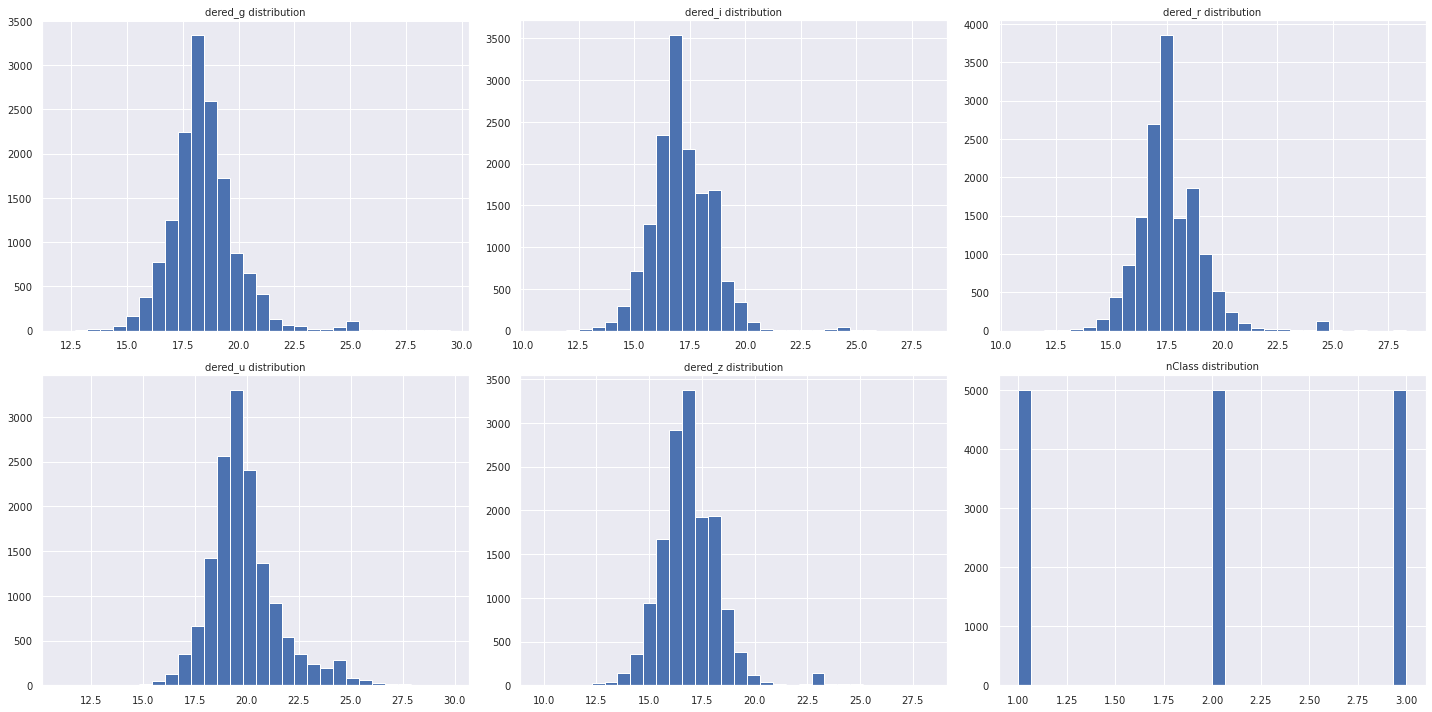

In [11]:
# plotting histograms of the data. 
hist_plots(data=data1,
          rows=2,
          cols=3,
          figsize=(20,10))

### Colours

As stated in the introduction, colour is defined as the difference between the magnitudes of two passbands (u, g, r, i, z). The most comon colours are between adjacent bands; therefore (u-g),(g-r),(r-i),(i-z). What do the colours tell us? Mainly, they tell us roughly about the shape of the spectrum of the electromagnetic radiation of the source. In the case of stars, it indicates temperature. In the case of galaxies, it can indicate age and shape of the galaxy. The redder the galaxy, the older the population and or more dust. The bluer the galaxy, the younger the population and or less dust. It is also an indication of starformation within the galaxy. 

In [12]:
# Create a function to calculate the colours of the sources
def compute_colour(row):
    u = row['dered_u']
    g = row['dered_g']
    r = row['dered_r']
    i = row['dered_i']
    z = row['dered_z']
    return pd.Series({'u-g': u - g, 'g-r': g - r, 'r-i': r - i, 'i-z': i - z})
# Apply the function compute_colour
colour_ind = data1.apply(compute_colour, axis=1)
# Create new dataframe with the colours added
data_colour = pd.concat([data1,colour_ind], axis=1)
data_colour.head()

,dered_u,dered_g,dered_r,dered_i,dered_z,nClass,u-g,g-r,r-i,i-z
1240,16.37196,15.17459,14.57207,14.23728,13.95632,3,1.19737,0.60252,0.33479,0.28096
386,18.80106,17.65714,17.13740,16.79474,16.65291,3,1.14392,0.51974,0.34266,0.14183
3214,17.01388,15.24735,14.37592,13.91500,13.52785,3,1.76653,0.87143,0.46092,0.38715
4124,18.37570,16.42698,15.44051,15.00039,14.61607,3,1.94872,0.98647,0.44012,0.38432
4538,19.53299,16.92769,15.73701,15.22108,14.95607,1,2.60530,1.19068,0.51593,0.26501


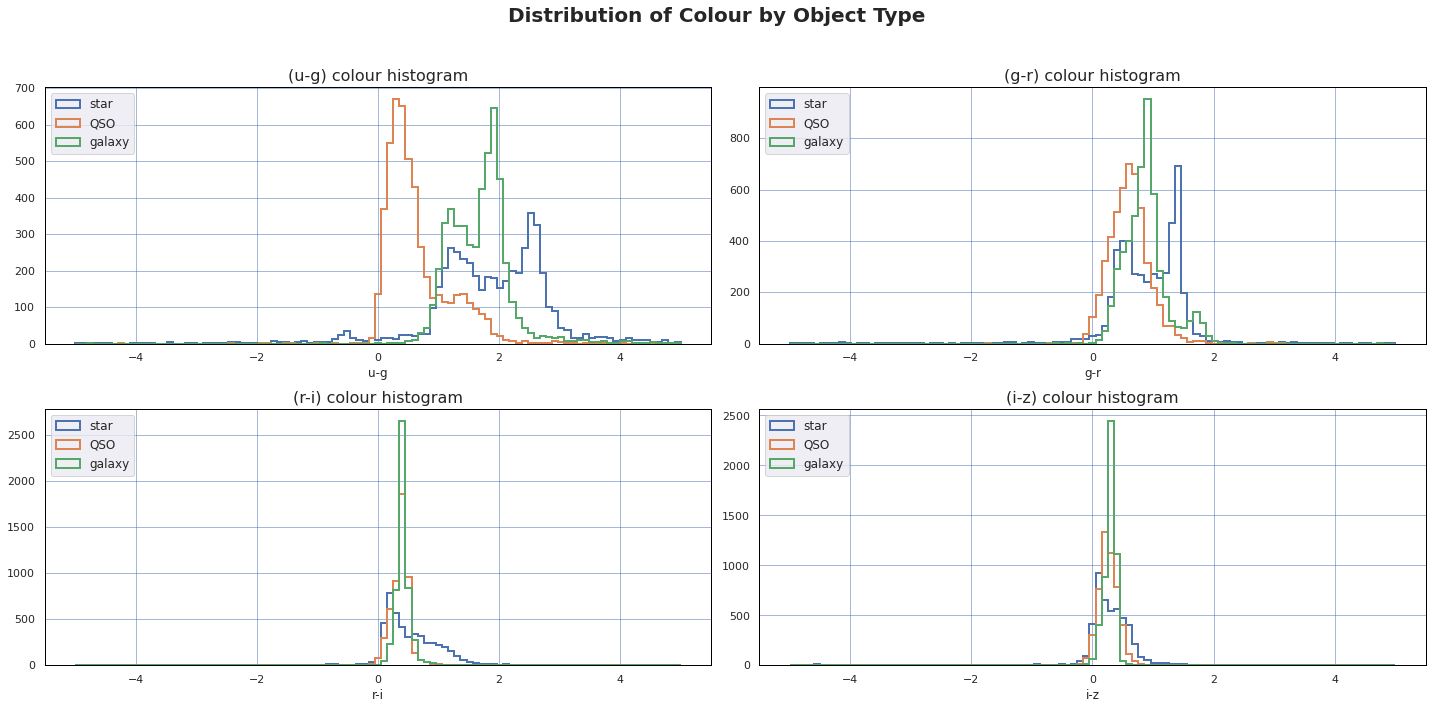

In [13]:
# Create histograms of the colours for each object type in the same plot
# Create boolean series for each of the classes of objects
star = data_colour['nClass']  == 1
QSO = data_colour['nClass']  == 2
galaxy = data_colour['nClass']  == 3
colour = ['u-g','g-r','r-i','i-z']

# Create subplots and plot histograms
bins = np.linspace(-5, 5, 100)
fig,axs = plt.subplots(2,2, figsize=(20,10), edgecolor='black')
axs = axs.ravel()

for i, n in enumerate(colour):
    ax = axs[i]
    X = data_colour[n]
    #create the histograms for the object type per colour
    ax.hist(X[star], bins,histtype='step', linewidth=2,label='star')
    ax.hist(X[QSO], bins,histtype='step', linewidth=2, label='QSO')
    ax.hist(X[galaxy], bins,histtype='step', linewidth=2, label='galaxy')
    # Making it pretty with frame and grid
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.grid(color='b', linestyle='-', linewidth=0.5)
    ax.set_facecolor('xkcd:white')
    #set legend, lables and title
    ax.legend(loc='upper left',fontsize=12)
    ax.set_xlabel(n)
    ax.set_title(f'({n}) colour histogram', fontsize=16)
    
fig.suptitle('Distribution of Colour by Object Type', fontsize=20, fontweight="bold")
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

For stars, in the (u-g) and (g-r) distributions, we can see bimodality which indicates the temperature of the star whether is a hot blue star (to the left of the distribution) or a cold red star(to the right). The distributions of (r-i) and (i-z) show this bimodality less and in fact, the distributions are more congruent with a positive skewed distribution. As the colours move more to the infrared side of the bands' spectrum, they are less sensitive to the temperature and more sensitive to interstellar dust, metalicity and age.

For QSOs, the (u-g) distribution peak is much bluer than that of stars and galaxies.  It is as expected since what we see in QSOs are the active galactic nuclei(AGN, supermassive black holes)  that outshine the stars of their host galaxies. The radiation peaks at the blue end of the spectrum.  There is a small second population that is redder (to the left) than the rest of the population and this can be due to the fact that there is a combination of radiation from the AGN and the host galaxies. In the (g-r), we are seeing more of the radiation of the host galaxies but the distribution is still bluer than the galaxy distribution. In the distributions of (r-i) and (i-z), the galaxy and QSOs distributions are indistinguishable. Here, we are seeing the host galaxy radiation. 

For galaxies, there is a bimodal distribution in the (u-g) and (g-r). What we are seeing here is two populations; one population of young blue galaxies and the other of old red galaxies. On the other hand, the distributions of (r-i) and (i-z) show a very narrow distribution with a high peak. This could be due to the fact that we are sampling interstellar dust. Dust can absorb or scatter the light emitted by stars in a galaxy which makes the galaxy appear redder than it actually is. These distributions can be affected by the limited wavelength coverage of the bands.


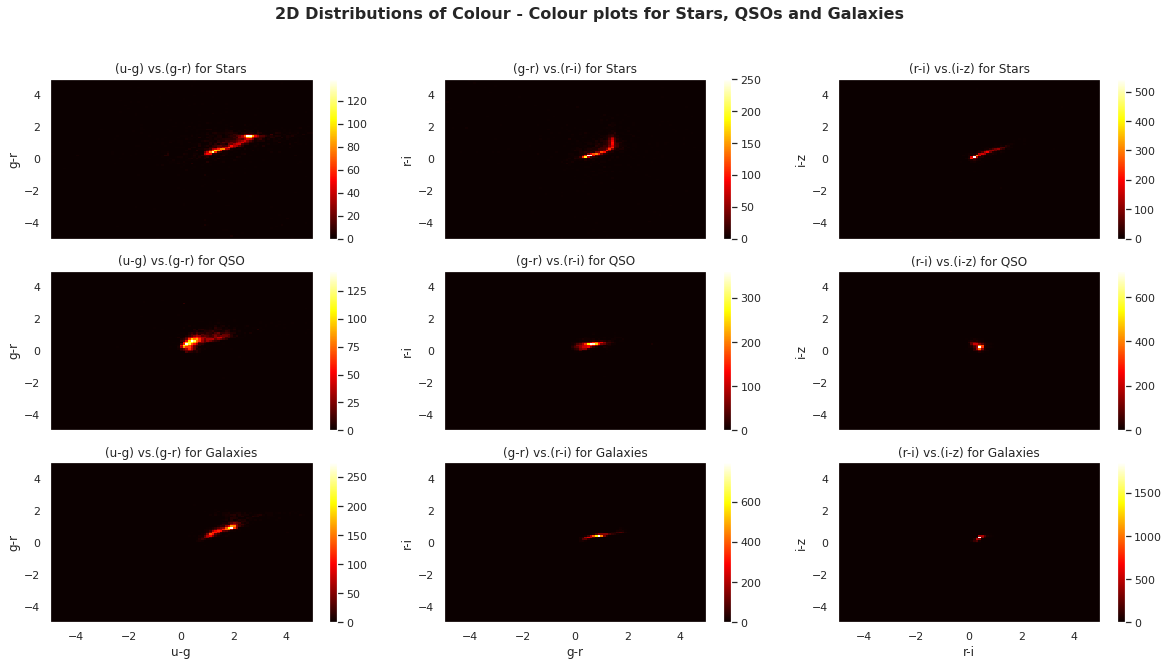

In [14]:
# Create 2D distributions for each colour vs colour for each object type
fig, axs = plt.subplots(3, 3, figsize=(20, 10), sharex='col')

bins = np.linspace(-5, 5, 100)

classes = [star, QSO, galaxy]
objects = ['Stars', 'QSO', 'Galaxies']

for i in range(len(colour)-1):
    for j, n in enumerate(classes):
        
        h = axs[j, i].hist2d(data_colour[colour[i]][n], data_colour[colour[i + 1]][n], bins, cmap='hot')
        
        # Set labels for each subplot
        axs[j, i].set_title(f'({colour[i]}) vs.' f'({colour[i+1]}) for ' f'{objects[j]}')
        axs[j, i].set_ylabel(colour[i + 1])
        if j>= 2 :
                axs[j,i].set_xlabel(colour[i])
        
        # Add colorbars to each subplot
        fig.colorbar(h[3], ax=axs[j, i])    
            

fig.suptitle('2D Distributions of Colour - Colour plots for Stars, QSOs and Galaxies', fontsize=16, fontweight="bold")
#plt.savefig('/home/veroastro/Documents/spectraTypes/images/2dH_colour.pdf')
# Show the plot
plt.show()

Colour-colour plots are tools that help us in the study of the properties of astronomical objects and their evolution over time. In the case of stars, the (u-g) vs. (g-r) plot distinguishes between the hot, blue stars and the cold red stars. The position of a star in the plot depends on its temperature and the composition of its atmosphere, with hotter stars on the lower left side and colder stars on the upper right side. The (g-r) vs. (r-i) plot differentiates between stars of different temperatures and spectral types. The vertical axis (r-i) represents the star's metallicity, with metal-poor stars located towards the bottom and metal-rich stars towards the top. The (r-i) vs. (i-z) plot shows how stars of different colours and metallicities are affected by interstellar dust. Dust extinction causes reddening, which shifts colours to the red side of the spectrum.  Stars with higher levels of dust extinction will be located on the upper right side. The plot can also reveal any possible relationships between dust extinction and the age or metallicity of stars.

In the case of QSOs, the (u-g) vs. (g-r) plot shows that most of the QSOs lie in a region with a tail that extends to the left and upper side (redder direction). This tail can be caused by two things: higher redshift (distance to the object) or that the spectra of these sources have emissions from the host galaxies too. This is more visible in the (g-r) vs. (r-i) plot where the plot is similar to that of the galaxies plot. The (r-i) vs. (i-z) plot shows a distribution that is very similar to that of galaxies, as we are primarily sampling the host galaxy radiation.

In the case of galaxies, the (u-g) vs. (g-r) plot shows a wide range that goes between the blue cloud (young, star-forming galaxies) in the left and down and the red sequence (older and more passive galaxies) in the right and upper side. In the (g-r) vs. (r-i) plot, the  (g-r) colour is more sensitive to the age of the galaxy and the  (r-i) is more sensitive to their metallicity. The (r-i) vs. (i-z) shows how galaxies are affected by interstellar dust.


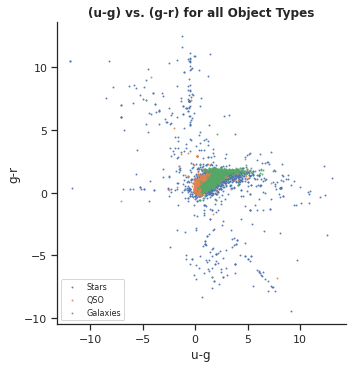

In [15]:
#Scatter plot hued by classes

sns.set_style("ticks")
  
sns.lmplot( x="u-g", y="g-r", data= data_colour, fit_reg=False, hue='nClass', legend=False, scatter_kws={"s": 1})

# Add title and legend
plt.title('(u-g) vs. (g-r) for all Object Types', fontweight="bold")
plt.legend(objects, fontsize=8, loc='lower left')
#plt.savefig('/home/veroastro/Documents/spectraTypes/images/scatter_classes.pdf')
plt.show()

# Building the models

## Prepping the data

In [16]:
# Separating the features and the labled data and normalising the data
from sklearn.preprocessing import MinMaxScaler
cols= data1.columns[:-1]
X = data1[cols]
scaler = MinMaxScaler()
X_t = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_t, columns = X.columns)


In [17]:
# split the data in train and test subsets
from sklearn.model_selection import StratifiedShuffleSplit


# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=3, 
                                          test_size=0.2, 
                                          random_state=42)



train_idx, test_idx = next(strat_shuf_split.split(X_t,data1['nClass']))
print(train_idx.shape)
print(test_idx.shape)

X_train = X_scaled[cols].iloc[train_idx]
y_train = data1['nClass'].iloc[train_idx]
X_test  = X_scaled[cols].iloc[test_idx]
y_test  = data1['nClass'].iloc[test_idx]

X_train.head()



(12000,)
(3000,)


,dered_u,dered_g,dered_r,dered_i,dered_z
1479,0.384312,0.297000,0.335352,0.313526,0.338103
8038,0.433277,0.339746,0.384372,0.370081,0.393863
9189,0.444865,0.324913,0.337817,0.314364,0.333193
4999,0.456368,0.392325,0.417078,0.397255,0.413479
216,0.510123,0.356561,0.359293,0.329775,0.345871


In [18]:
# Prepping the colour data set.
X_colour = data_colour.drop(['nClass'], axis = 1)#pd.concat([X,colour_indices], axis=1)
print(X_colour.head())

# Normalising the colour dataset
Xc_t = scaler.fit_transform(X_colour)
Xc_scaled = pd.DataFrame(Xc_t, columns = X_colour.columns)

# Splitting colour dataset into train and test.
X_train_c = Xc_scaled.iloc[train_idx]
X_test_c  = Xc_scaled.iloc[test_idx]

       dered_u   dered_g   dered_r   dered_i   dered_z      u-g      g-r  \
1240  16.37196  15.17459  14.57207  14.23728  13.95632  1.19737  0.60252   
386   18.80106  17.65714  17.13740  16.79474  16.65291  1.14392  0.51974   
3214  17.01388  15.24735  14.37592  13.91500  13.52785  1.76653  0.87143   
4124  18.37570  16.42698  15.44051  15.00039  14.61607  1.94872  0.98647   
4538  19.53299  16.92769  15.73701  15.22108  14.95607  2.60530  1.19068   

          r-i      i-z  
1240  0.33479  0.28096  
386   0.34266  0.14183  
3214  0.46092  0.38715  
4124  0.44012  0.38432  
4538  0.51593  0.26501  


## Building Models

To classify the data, I build several Machine Learning models. I use Logistic Regression, Random Forest Classifier, Decision Tree Classifier, Gradient Boosting Classifier and Suppor Vector Machine.

To optimize the performance of each model, I fine-tuned the hyperparameters of each model using GridSearchCV. And even if it does crossvalidation on the dataset, I still divided the data 80% for training and 20% for testing, in order to test the model on new data. 

Each of the classifiers has its own strengths and weaknesses. So, I compared their performance on the testing set to determine the best model for the classification task.

### Logistic Regression

It is a statistical model that used for binary classification. The model uses the sigmoid fuction to classify the dependend variable. The sigmoid function is a mathematical function that follows the formula
$$
    S(x) =  \frac{1}{1+e^{-x}} 
$$
which has a s shaped curve that ranges from 0 to 1. Logistic Regression applies the sigmoid function to a linear combination of input variables, and then uses a threshold value to classify the output as either 0 or 1.

While Logistic Regression is a simple and effective model, it has some limitations. One of them is that it assumes that the relationship between input variables and the dependent variable is linear. And it doesn't do very well with non-linear relationships

I use the LogisticRegression algorythm from the Scikit-Learn library to classify the three classes of stellar objects. The parameters that are fine-tuned by GridSearchCV are:
* C which is the inverse of regularization strength. I choose to fine-tune over a range of 10$^{-3}$ to 10$^{3}$ in 50 steps.
* Penalty wich makes the fitted parameters smaller to prevent over-fitting. It is either l1 or l2 or elasticnet. L1 adds apenalty equal to the absolute value of the magnitude of coefficients. L2 adds a penalty equal to the square of the magnitude of coefficients. Elasticnet which combines penalties l1 and l2.
* Solver which is the optimization algorithm. I use the solvers: lbfgs, newton-cg, sag, saga because they generalise well to multi-classes problems.



In [19]:
# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters to be tuned using GridSearchCV
LR_param = {"C":np.logspace(-3,3,50), "penalty":["l1","l2","Elasticnet"],
          "solver":['lbfgs', 'newton-cg', 'sag', 'saga']}

# Creating an instance of GridSearchCV for logistic regression
LR_grid = GridSearchCV(LogisticRegression(max_iter = 5000), LR_param)

# Fitting the GridSearchCV object on the training data
LR = LR_grid.fit(X_train, y_train)

/home/veroastro/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1750 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/home/veroastro/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/veroastro/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/veroastro/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line

In [20]:
# Printing the best parameters and its accuracy.
LR.best_params_ ,LR.best_score_

({'C': 244.205309454865, 'penalty': 'l2', 'solver': 'sag'}, 0.6337499999999999)

I tried different values of max_iter(maximum number of iterations taken for the solvers to converge). Because the default value was not enought to converge.

There is the error "FitFailedWarning: 1750 fits failed out of a total of 3000. The score on these train-test partitions for these parameters will be set to nan.". These errors are due to the fact that not all solvers support all penalties. 

In [21]:
#Predict y values (classes) using the model obtained.
LR_y_pred=LR.predict(X_test)

In [22]:
#Check predicted values of the test data with the actual values. 
from sklearn.metrics import classification_report

cr = classification_report(y_test, LR_y_pred)
print(cr)


              precision    recall  f1-score   support

           1       0.63      0.49      0.55      1000
           2       0.72      0.80      0.76      1000
           3       0.57      0.63      0.60      1000

    accuracy                           0.64      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.64      0.64      0.64      3000



The model seems to classify class 2 which are QSOs than star and galaxies in precision, recal and F1 score. For the stars(1) and galaxies(3), it is close to randomly classifying them. The overall accuracy is 63% which is not very high. This means that the model is correctly classifying 63% of the samples in the dataset.

# test with colours
GR_c = LR_grid.fit(X_train_c, y_train)
GR_c.best_params_ ,GR_c.best_score_

LR_pred_c=GR_c.predict(X_test_c)

cr_c = classification_report(y_test, LR_pred_c)
print(cr_c)

 Colour doesn't affect the estimation of the spectral classes

### Decision Tree Classifier

A decision tree is a non-parametric (it means it does not make particular assumptions about the form of mapping function)learning algorithm. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes. The decision tree starts with a root node with outgoing branches to the internal nodes. Both nodes then conduct evaluations to form homogenous subsets(leaf nodes). The operation splits the data recursively until there are only pure leaf nodes (data of only one class).The more complex the tree, the more it can lead to overfitting.  

The parameters that are fine-tuned by GridSearchCV are:
* criterion which measures the quality of a split. 
* max_depth which is the maximum depth of the tree. The range chosen is from 1 to 500 in steps of 5. 
* max_features which is number of features taken into consideration when looking for the best split. 'sqrt' is the square root of the number of features and 'log2' is the log with base 2 of the number of features.

In [24]:
# Importing libraries
from sklearn.tree import DecisionTreeClassifier

# Defining the hyperparameters to be tuned using GridSearchCV
DT_param = {'criterion' : ['gini', 'entropy'],
            'max_depth':range(1, 500, 5),
            'max_features': [ 'sqrt', 'log2']}
# Creating an instance of GridSearchCV for Decision Tree Classifier
DT_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=DT_param,
                  scoring='accuracy',
                  n_jobs=-1)
# Fitting the GridSearchCV object on the training data
DT = DT_grid.fit(X_train, y_train)

In [25]:
# Printing the best parameters and its accuracy.
#GR_dt.tree_.node_count, GR_dt.tree_.max_depth
DT.best_params_ ,DT.best_score_

({'criterion': 'entropy', 'max_depth': 31, 'max_features': 'sqrt'},
 0.8438333333333332)

In [26]:
#Predict y values (classes) using the model obtained.
y_pred_dt = DT.predict(X_test)
#Check predicted values of the test data with the actual values. 
cr_dt = classification_report(y_test, y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           1       0.86      0.83      0.85      1000
           2       0.85      0.86      0.86      1000
           3       0.81      0.83      0.82      1000

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



The test accuracy is 0.85. It is an improvement on the Logistic Regression. But it still means that 15% of the objects are misclassified. From the precision column, the model is best at classifying positive QSOs(class 2)  and worst at galaxies (class 3). Recall shows similar values between classes. The F1 score shows that altogether, it is best at classifying QSOs and worst at classifying galaxies. 

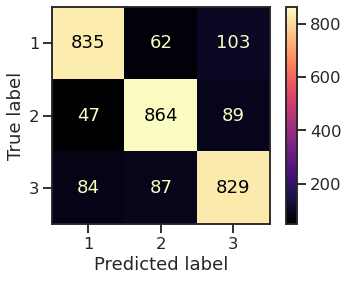

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create confusion matrix
DT_cm = confusion_matrix(y_test, y_pred_dt)
# Creat display for confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=DT_cm,
                              display_labels=DT_grid.classes_)
#Plot confusion Matrix
disp.plot(cmap='magma')
plt.show()

Looking at the true positives (True label = Predicted Label), class 2 (QSO) has the highest number and class 3 (galaxies) has the lowest numbers. Class 1 (stars) are more often misclassified as class 3. Class 2 are more often misclassified as class 3.

### Random Forest Classifier
              

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators':range(1,400, 40)}


RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)
rf = GridSearchCV(RF,
                  param_grid=param_grid)

rf = rf.fit(X_train, y_train)

In [ ]:
rf.best_params_ ,rf.best_score_

In [ ]:
y_pred_rf = rf.predict(X_test)
cr = classification_report(y_test, y_pred_rf)
print(cr)

In [ ]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred_rf)
ax = sns.heatmap(cm, annot=True, fmt='d')

### Gradient Boosting Classifier (GBC)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

tree_list = [15, 25, 50, 100, 200, 400]
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5]}

# The grid search object
GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GBC_grid = GBC.fit(X_train, y_train)

y_pred_gbc = GBC_grid.predict(X_test)
print(classification_report(y_pred_gbc, y_test))

In [ ]:

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred_gbc)
ax = sns.heatmap(cm, annot=True, fmt='d')

### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
SVM_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
SVM_grid.fit(X_train, y_train)

# print best parameter after tuning
print(SVM_grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(SVM_grid.best_estimator_)

In [ ]:
SVM_grid_pred = SVM_grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, SVM_grid_pred))

# Conclusion

I obtained 90% accuracy with Random Forest Classifier and over 82% on the other classifiers except Logistic Regression (62%) which was a litle over random in some cases. Colours, as expected from the image (ug vs gr), didn't add any new information to the models. 

This is less than obtained on the Determining Redshift notebook and not good enough to imporove estimation of redshifts.